In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# In 1970's HSL (Hue,Saturation,Lightness) and HSV (Hue,Saturation,value) were developed as alternative colour models.
# HSL and HSV are more closely allignes with the way humen vision actually percive colour
image = cv2.imread('00-puppy.jpg')

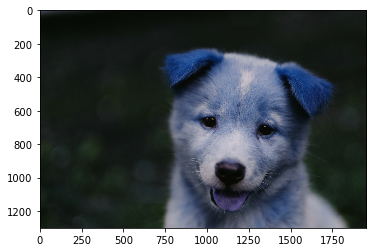

In [3]:
plt.imshow(image)
# image BGR

In [4]:
new_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

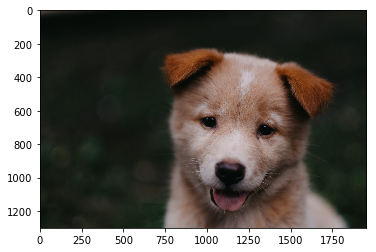

In [5]:
plt.imshow(new_image)

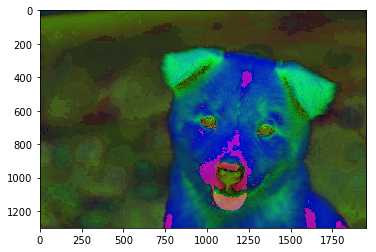

In [6]:
# RGB to HSV
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_RGB2HSV))

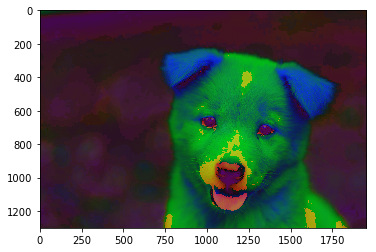

In [7]:
# RGB to HSL
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_RGB2HLS))

Image blending

# Blending images is done through addWeighted Function that uses both images and combine them.
# to bend images a simle formulae is use new_pixel = pixel_1*Alpha + pixel_2*Beta + Gamma.

In [9]:
image1 = cv2.imread('00-puppy.jpg')
image2 = cv2.imread('watermark_no_copy.png')
image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [10]:
image1.shape,image2.shape

((1300, 1950, 3), (1280, 1277, 3))

In [11]:
# bleding images of same size
image1 = cv2.resize(image1,(1200,1200))
image2 = cv2.resize(image2,(1200,1200))

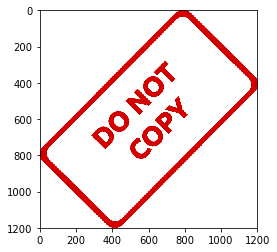

In [15]:
plt.imshow(image2)

In [17]:
# only work when we have image of same size.
blended_image = cv2.addWeighted(image1,0.5,image2,0.5,0)

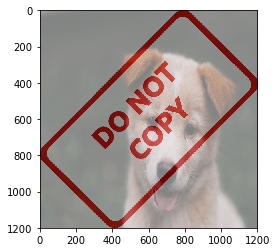

In [18]:
plt.imshow(blended_image)

In [19]:
# Overlay small image on top of large image with no blending
# Numpy reassignment operation
image1 = cv2.imread('00-puppy.jpg')
image2 = cv2.imread('watermark_no_copy.png')
image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [20]:
image1.shape, image2.shape

((1300, 1950, 3), (1280, 1277, 3))

In [21]:
# Image 2 is smaller
image2 = cv2.resize(image2,(600,600))

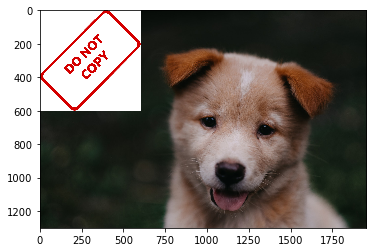

In [23]:
large_image = image1
small_image = image2
x_offset = 0
y_offset = 0
x_end = x_offset + small_image.shape[1]
y_end = y_offset + small_image.shape[0]
large_image[y_offset:y_end,x_offset:x_end] = small_image
plt.imshow(large_image)

Blending the images with mask

In [24]:
image1 = cv2.imread('00-puppy.jpg')
image2 = cv2.imread('watermark_no_copy.png')
image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [25]:
image2 = cv2.resize(image2,(600,600))

In [26]:
image1.shape

(1300, 1950, 3)

In [28]:
x_offset = image.shape[1]-600
y_offset = image.shape[0]-600
rows,columns,channels = image2.shape
# Region of Interest
roi = image1[y_offset:image1.shape[0],x_offset:image1.shape[1]]

In [30]:
image2_grey = cv2.cvtColor(image2,cv2.COLOR_RGB2GRAY)

In [31]:
mask_inv = cv2.bitwise_not(image2_grey)

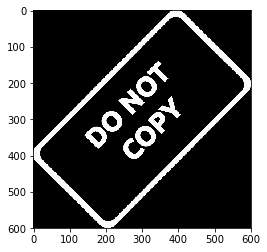

In [34]:
plt.imshow(mask_inv,cmap='gray')

In [35]:
white_background = np.full(image2.shape,255,dtype=np.uint8)

In [36]:
white_background.shape

(600, 600, 3)

In [41]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [42]:
bk.shape

(600, 600, 3)

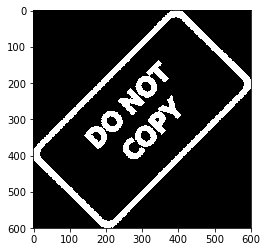

In [43]:
plt.imshow(bk)

In [44]:
fg = cv2.bitwise_or(image2,image2,mask=mask_inv)

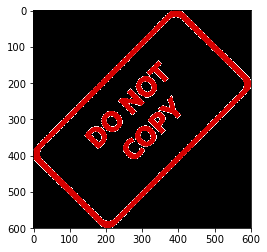

In [45]:
plt.imshow(fg)

In [46]:
final_roi = cv2.bitwise_or(roi,fg)

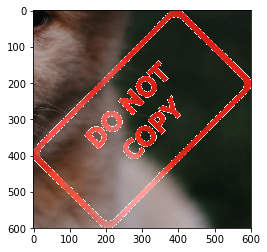

In [47]:
plt.imshow(final_roi)

In [48]:
large_image = image1
small_image = final_roi

In [50]:
large_image[y_offset:y_offset+small_image.shape[0],x_offset:x_offset+small_image.shape[1]] = small_image

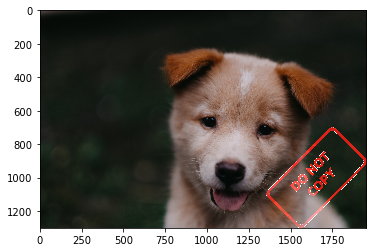

In [51]:
plt.imshow(large_image)

Binary Image or Theresholding

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
image = cv2.imread('rainbow.jpg',cv2.IMREAD_GRAYSCALE)
# in place of cv2.IMREAD_GRAYSCALE pass 0 it will work in same way

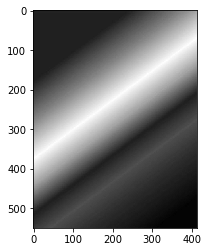

In [6]:
plt.imshow(image,cmap='gray')

In [7]:
# select half of 255 that is 127
ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)

In [8]:
ret

127.0

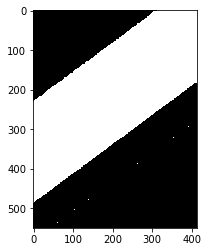

In [9]:
plt.imshow(thresh1,cmap='gray')

In [10]:
# in the below code we are not going to use threshold
th2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8)

Blurring and Smoothning

In [1]:
# Method  
# 1. Gamma Correction
# 2. kernal based filters
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
image = cv2.imread('C:/Users/Mohd Faizan Umar/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/bricks.jpg').astype(np.float32)/255
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

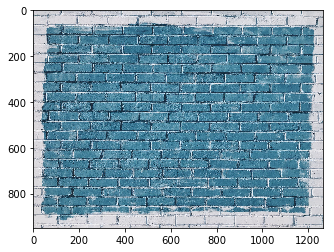

In [7]:
plt.imshow(image)

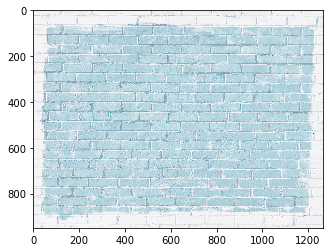

In [8]:
# smaller value of gamma will lighter the image and large value of gamma will darker the image.
gamma = 1/4
image = np.power(image,gamma)
plt.imshow(image)

In [9]:
# Low pass filter with 2D convolution
image = cv2.imread('C:/Users/Mohd Faizan Umar/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/bricks.jpg').astype(np.float32)/255
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [10]:
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(image,'Brics',(10,600),fontFace=font,fontScale=10,color=(255,0,0),thickness=4)

array([[[0.7921569 , 0.78431374, 0.8039216 ],
        [0.7529412 , 0.77254903, 0.7882353 ],
        [0.7176471 , 0.76862746, 0.8       ],
        ...,
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ]],

       [[0.88235295, 0.8784314 , 0.8980392 ],
        [0.75686276, 0.78431374, 0.80784315],
        [0.69803923, 0.75686276, 0.78431374],
        ...,
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ]],

       [[0.8627451 , 0.8666667 , 0.8862745 ],
        [0.64705884, 0.68235296, 0.70980394],
        [0.48235294, 0.5372549 , 0.57254905],
        ...,
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ]],

       ...,

       [[0.8509804 , 0.83137256, 0.84705883],
        [0.84705883, 0.827451  , 0.84313726],
        [0.84313726, 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


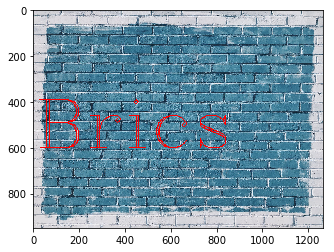

In [11]:
plt.imshow(image)

In [12]:
kernal = np.ones((5,5),dtype=np.float32)/25

In [13]:
dist = cv2.filter2D(image,-1,kernal,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


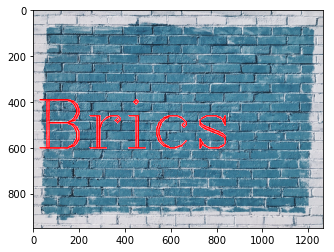

In [14]:
plt.imshow(dist)

In [17]:
# Reset the image
image = cv2.imread('C:/Users/Mohd Faizan Umar/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/bricks.jpg').astype(np.float32)/255
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(image,'Brics',(10,600),fontFace=font,fontScale=10,color=(255,0,0),thickness=4)
print(reset)

array([[[0.7921569 , 0.78431374, 0.8039216 ],
        [0.7529412 , 0.77254903, 0.7882353 ],
        [0.7176471 , 0.76862746, 0.8       ],
        ...,
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ]],

       [[0.88235295, 0.8784314 , 0.8980392 ],
        [0.75686276, 0.78431374, 0.80784315],
        [0.69803923, 0.75686276, 0.78431374],
        ...,
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ]],

       [[0.8627451 , 0.8666667 , 0.8862745 ],
        [0.64705884, 0.68235296, 0.70980394],
        [0.48235294, 0.5372549 , 0.57254905],
        ...,
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ],
        [0.7764706 , 0.76862746, 0.7882353 ]],

       ...,

       [[0.8509804 , 0.83137256, 0.84705883],
        [0.84705883, 0.827451  , 0.84313726],
        [0.84313726, 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


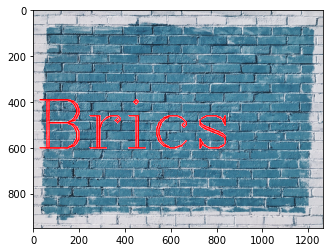

In [18]:
blured = cv2.blur(image,ksize=(5,5))
plt.imshow(blured)

In [20]:
# Reset the image, Gaussian and median blurring
image = cv2.imread('C:/Users/Mohd Faizan Umar/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/bricks.jpg').astype(np.float32)/255
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(image,'Brics',(10,600),fontFace=font,fontScale=10,color=(255,0,0),thickness=4)
print('reset')

reset


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


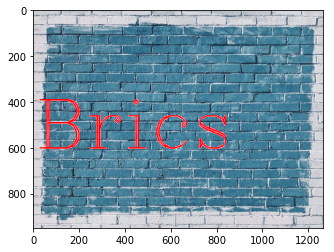

In [21]:
blurred_image = cv2.GaussianBlur(image,(5,5),10)
plt.imshow(blurred_image)

In [22]:
# Reset the image, Gaussian and median blurring
image = cv2.imread('C:/Users/Mohd Faizan Umar/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/bricks.jpg').astype(np.float32)/255
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(image,'Brics',(10,600),fontFace=font,fontScale=10,color=(255,0,0),thickness=4)
print('reset')

reset


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


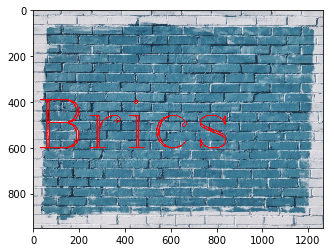

In [24]:
blurred_image = cv2.medianBlur(image,5)
plt.imshow(blurred_image)

In [25]:
# Reset the image, Gaussian and median blurring
image = cv2.imread('C:/Users/Mohd Faizan Umar/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sammy.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


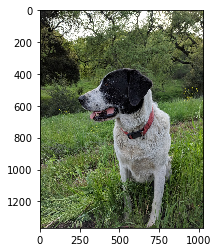

In [26]:
plt.imshow(image)

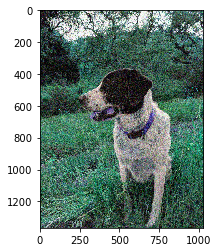

In [27]:
image = cv2.imread('C:/Users/Mohd Faizan Umar/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sammy_noise.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

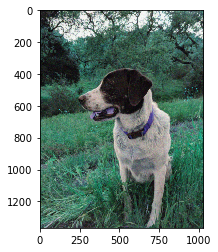

In [28]:
img = cv2.medianBlur(image,5)
plt.imshow(img)

In [29]:
# Bileteral Filtering
# Reset the image, Gaussian and median blurring
image = cv2.imread('C:/Users/Mohd Faizan Umar/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/bricks.jpg').astype(np.float32)/255
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(image,'Brics',(10,600),fontFace=font,fontScale=10,color=(255,0,0),thickness=4)
print('reset')

reset


In [30]:
blur = cv2.bilateralFilter(image,9,75,75)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


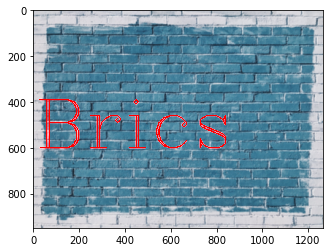

In [31]:
plt.imshow(blur)